In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from itertools import product

# Parameters
alpha = 3    # rate of detuning change
omega = 0    # coupling strength
tau = 5.0      # max time range
num_points = 500  # resolution

def Hamiltonian(alpha, Omega, tau, num_points):
    # Time array
    t_vals = np.linspace(-tau, tau, num_points)

    # Store eigenvalues
    eigenvalues = np.zeros((2, num_points))

    # Loop over time values and compute eigenvalues
    for i, t in enumerate(t_vals):
        Delta = alpha * t
        H = np.array([[Delta, Omega / 2],
                      [Omega / 2, -Delta]])
    
        # Sorted eigenvalues (for consistent plotting)
        eigvals = np.linalg.eigvalsh(H)
        eigenvalues[:, i] = eigvals

    # Plot the energy levels
    plt.figure(figsize=(8, 5))
    plt.plot(t_vals, eigenvalues[0, :], label='E₁ (lower energy)')
    plt.plot(t_vals, eigenvalues[1, :], label='E₂ (higher energy)')
    plt.title('Energy Spectrum of the Two-Level System (Diabatic)')
    plt.xlabel('Time t')
    plt.ylabel('Energy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

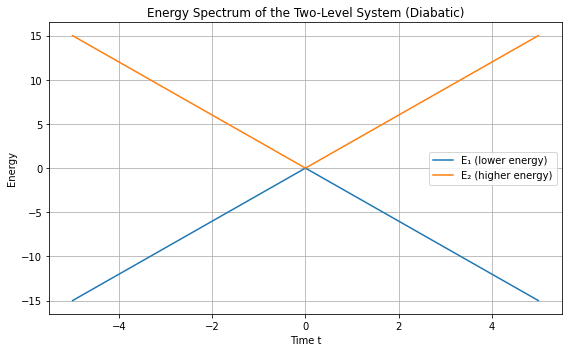

In [2]:
##Compare this to the situation where the hamiltonian has no off-diagonal elements
omega = 0

Hamiltonian(alpha, omega, tau, num_points)

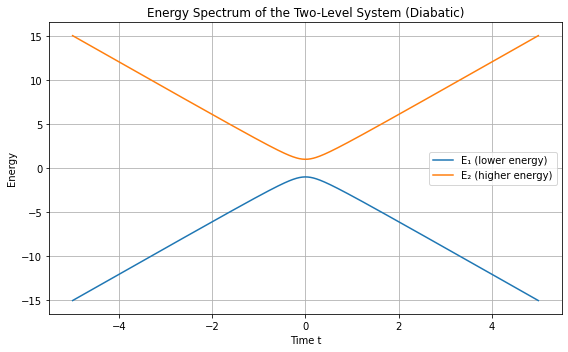

In [3]:
##Below is the Hamiltonian with off-diagonal elements and coupling
omega = 2

Hamiltonian(alpha, omega, tau, num_points)

In [8]:
from scipy.integrate import solve_ivp

# --- Base Parameters ---
fixed_alpha = 1
fixed_Omega = 0.5
fixed_tau = 20.0

# --- Time-dependent Hamiltonian ---
def H(t, alpha, Omega):
    Delta = alpha * t
    return np.array([[Delta, Omega / 2],
                     [Omega / 2, -Delta]])

# --- Schrödinger Equation ---
def schrodinger(t, psi, alpha, Omega):
    psi = psi[:2] + 1j * psi[2:]
    H_t = H(t, alpha, Omega)
    dpsi_dt = -1j * H_t @ psi
    return np.concatenate((dpsi_dt.real, dpsi_dt.imag))

# --- Numerical computation of excited state probability ---
def compute_excited_probability(alpha, Omega, tau):
    t_span = (-tau, tau)
    t_eval = np.linspace(*t_span, 1000)
    
    eigvals, eigvecs = np.linalg.eigh(H(-tau, alpha, Omega))
    psi0 = eigvecs[:, 0]
    psi0_realimag = np.concatenate((psi0.real, psi0.imag))
    
    sol = solve_ivp(schrodinger, t_span, psi0_realimag, t_eval=t_eval,
                    args=(alpha, Omega), rtol=1e-9, atol=1e-12)
    
    psi_final = sol.y[:2, -1] + 1j * sol.y[2:, -1]
    excited_state = np.array([0, 1])
    return np.abs(np.vdot(excited_state, psi_final))**2

# --- Analytical Landau-Zener prediction ---
def landau_zener(alpha, Omega):
    return 1 - np.exp(-np.pi * Omega**2 / (2 * alpha))

# --- Sweep and plot both numerical and analytical predictions ---
def sweep_and_plot(param_name, param_values):
    numerical_probs = []
    analytical_probs = []
    print(f"Sweeping for {param_name}...")

    for val in param_values:
        if param_name == 'alpha':
            alpha, Omega, tau = val, fixed_Omega, fixed_tau
        elif param_name == 'Omega':
            alpha, Omega, tau = fixed_alpha, val, fixed_tau
        elif param_name == 'tau':
            alpha, Omega, tau = fixed_alpha, fixed_Omega, val
        else:
            raise ValueError("Invalid parameter name. use 'alpha', 'Omega', or 'tau'")
        
        # Compute probabilities
        P_num = compute_excited_probability(alpha, Omega, tau)
        P_lz = landau_zener(alpha, Omega)

        numerical_probs.append(P_num)
        analytical_probs.append(P_lz)

        print(f"{param_name} = {val:.3f} → Numerical = {P_num:.6f}, LZ = {P_lz:.6f}")

    # --- Plot ---
    plt.figure()
    plt.plot(param_values, numerical_probs, 'o-', label='Numerical')
    plt.plot(param_values, analytical_probs, 's--', label='Landau-Zener')
    plt.xlabel(param_name)
    plt.ylabel('P(excited)')
    plt.title(f'Excited State Probability vs {param_name}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

Sweeping for alpha...
alpha = 0.000 → Numerical = 0.500000, LZ = 1.000000
alpha = 0.050 → Numerical = 0.973305, LZ = 0.999612
alpha = 0.100 → Numerical = 0.861617, LZ = 0.980297


C:\Users\Student\AppData\Local\Temp/ipykernel_16720/4223676862.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - np.exp(-np.pi * Omega**2 / (2 * alpha))


alpha = 0.150 → Numerical = 0.707647, LZ = 0.927051
alpha = 0.200 → Numerical = 0.594923, LZ = 0.859633
alpha = 0.250 → Numerical = 0.530114, LZ = 0.792120
alpha = 0.300 → Numerical = 0.489482, LZ = 0.729909
alpha = 0.350 → Numerical = 0.447059, LZ = 0.674371
alpha = 0.400 → Numerical = 0.395489, LZ = 0.625344
alpha = 0.450 → Numerical = 0.346302, LZ = 0.582163
alpha = 0.500 → Numerical = 0.313217, LZ = 0.544062
alpha = 0.550 → Numerical = 0.296974, LZ = 0.510318
alpha = 0.600 → Numerical = 0.285852, LZ = 0.480297
alpha = 0.650 → Numerical = 0.268669, LZ = 0.453463
alpha = 0.700 → Numerical = 0.245267, LZ = 0.429361
alpha = 0.750 → Numerical = 0.224284, LZ = 0.407615
alpha = 0.800 → Numerical = 0.212405, LZ = 0.387909
alpha = 0.850 → Numerical = 0.207361, LZ = 0.369977
alpha = 0.900 → Numerical = 0.201376, LZ = 0.353597
alpha = 0.950 → Numerical = 0.189988, LZ = 0.338581


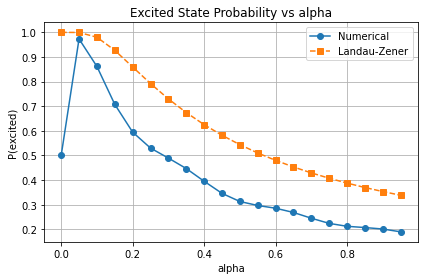

In [9]:
alpha_values = np.arange(0, 1, 0.05)
sweep_and_plot('alpha', alpha_values)

Sweeping for Omega...
Omega = 0.500 → Numerical = 0.176190, LZ = 0.324768
Omega = 1.000 → Numerical = 0.532755, LZ = 0.792120
Omega = 1.500 → Numerical = 0.818098, LZ = 0.970821
Omega = 2.000 → Numerical = 0.962562, LZ = 0.998133
Omega = 2.500 → Numerical = 0.994344, LZ = 0.999946
Omega = 3.000 → Numerical = 0.995604, LZ = 0.999999
Omega = 3.500 → Numerical = 0.998694, LZ = 1.000000
Omega = 4.000 → Numerical = 0.997375, LZ = 1.000000
Omega = 4.500 → Numerical = 0.996903, LZ = 1.000000
Omega = 5.000 → Numerical = 0.996141, LZ = 1.000000


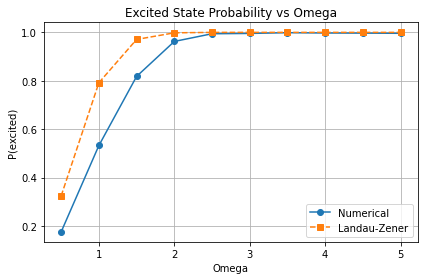

In [6]:
omega_values = np.arange(0.5, 5.5, 0.5)
sweep_and_plot('Omega', omega_values)

Sweeping for tau...
tau = 1.000 → Numerical = 0.930978, LZ = 0.956786
tau = 2.000 → Numerical = 0.880142, LZ = 0.956786
tau = 3.000 → Numerical = 0.747502, LZ = 0.956786
tau = 4.000 → Numerical = 0.830773, LZ = 0.956786
tau = 5.000 → Numerical = 0.799479, LZ = 0.956786
tau = 6.000 → Numerical = 0.780353, LZ = 0.956786
tau = 7.000 → Numerical = 0.763746, LZ = 0.956786
tau = 8.000 → Numerical = 0.793414, LZ = 0.956786
tau = 9.000 → Numerical = 0.779507, LZ = 0.956786
tau = 10.000 → Numerical = 0.787411, LZ = 0.956786


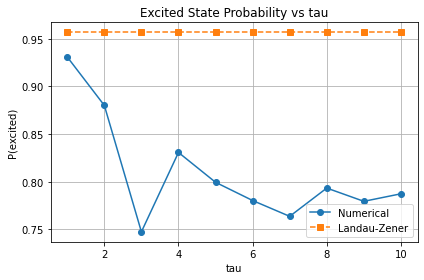

In [23]:
sweep_and_plot('tau', tau_values)

# Notes:
- As we expected Omega and alpha are very tied. The analytical solution is pretty much always equal to one unless alpha and Omega are similar. We can show this by having one plot where the values are around equal, although I should do some research now into what some acceptable values for alpha and Omega are so I can keep them in a range. Maybe I can plot them both against each other in a heat map so I can show on on plot how the probability changes as they both vary? I think I should definitely do this, more effective AND efficient than the method I'm using now.

- We can easily see from the analytical equation that it won't be affected by Tau, but we should also keep in mind that the equation we're provided is valid ONLY for sufficiently large Tau. We can see that in the above plot, and we can show what happens when Tau is not large enough. Need to choose a suitable combination of alpha and Omega from previous heat maps and then understand why the system breaks down for small tau. Apparently because there isn't enough time for the system to adiabatically follow the instantaneous eigenstate.

In [15]:
# --- Compute time-dependent excited probability ---
def compute_excited_probability_vs_time(alpha, Omega, tau, n_points=1000):
    t_span = (-tau, tau)
    t_eval = np.linspace(*t_span, n_points)

    # Initial state = ground state at t = -tau
    eigvals, eigvecs = np.linalg.eigh(H(-tau, alpha, Omega))
    psi0 = eigvecs[:, 0]
    psi0_realimag = np.concatenate((psi0.real, psi0.imag))

    sol = solve_ivp(schrodinger, t_span, psi0_realimag, t_eval=t_eval,
                    args=(alpha, Omega), rtol=1e-9, atol=1e-12)

    # Reconstruct wavefunction over time
    psi_t = sol.y[:2, :] + 1j * sol.y[2:, :]

    # Projection onto excited state |1>
    excited_state = np.array([0, 1])
    P_excited_t = np.abs(excited_state.conj() @ psi_t)**2

    return t_eval, P_excited_t

# --- Plot excited probability vs time for arrays of parameters ---
def plot_excited_vs_time(alpha_values, omega_values, tau_values):
    # Loop over all parameter combinations
    for alpha, Omega, tau in product(alpha_values, omega_values, tau_values):
        t, P_t = compute_excited_probability_vs_time(alpha, Omega, tau)

        plt.figure(figsize=(8, 5))
        plt.plot(t, P_t, lw=2)
        plt.xlabel("Time")
        plt.ylabel("P(excited, t)")
        plt.title(f"Excited State Probability vs Time\nα={alpha}, Ω={Omega}, τ={tau}")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

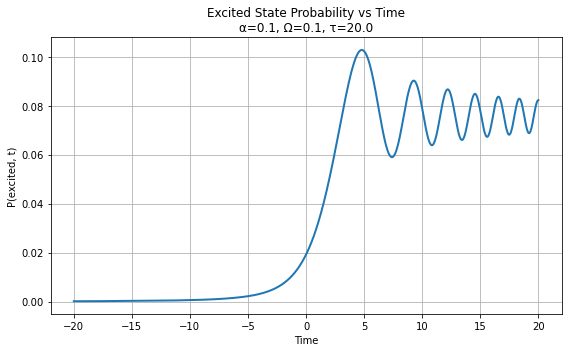

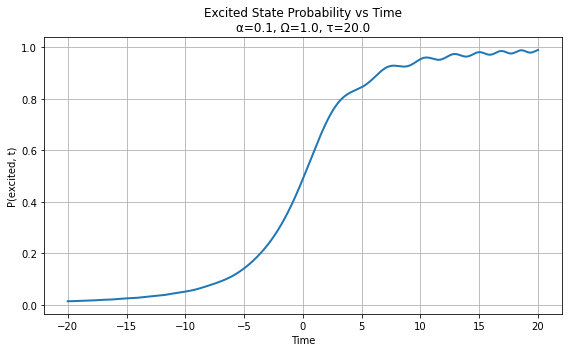

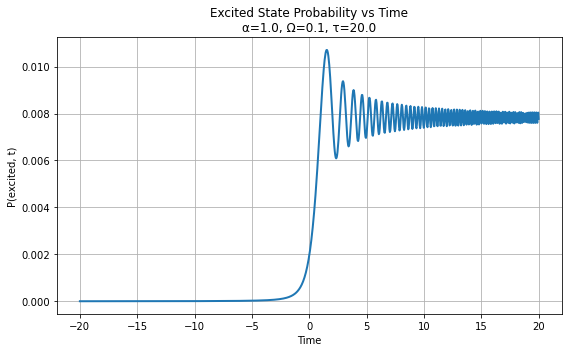

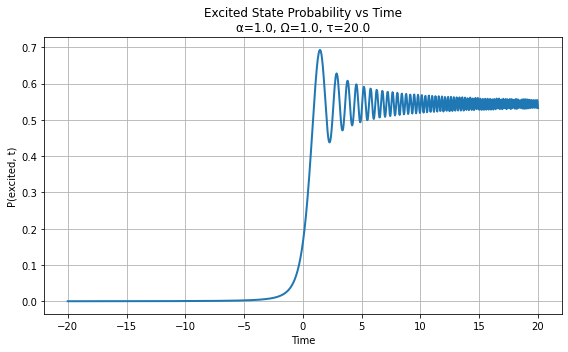

In [17]:
a_values = [0.1, 1.0]
o_values = [0.1, 1.0]
t_values   = [20.0]

plot_excited_vs_time(a_values, o_values, t_values)

# STIRAP

In [28]:
# Time-dependent Rabi frequencies (Gaussian pulses)
def Omega_A(t, tau=5.0):
    return np.exp(-((t - 5)**2) / (2 * tau**2))

def Omega_B(t, tau=2):
    return np.exp(-((t + 5)**2) / (2 * tau**2))

# STIRAP Hamiltonian in the {|0>, |e>, |1>} basis
def H_stirap(t, tau=5.0):
    OA = Omega_A(t, tau)
    OB = Omega_B(t, tau)
    return np.array([
        [0,    OA / 2,    0     ],
        [OA / 2,  0,    OB / 2 ],
        [0,    OB / 2,    0     ]
    ])

# Get dark state and energy gaps
def dark_state(t):
    H = H_stirap(t)
    eigvals, eigvecs = np.linalg.eigh(H)
    dark_idx = np.argmin(np.abs(eigvals))
    dark_state = eigvecs[:, dark_idx]
    gaps = [np.abs(eigvals[i] - eigvals[dark_idx]) for i in range(len(eigvals)) if i != dark_idx]
    return dark_state, gaps

In [7]:
# Time grid
times = np.linspace(-15, 15, 300)

# Data holders
dark_state_components = []  # amplitudes of |0>, |e>, |1>
gap1_list = []
gap2_list = []

# Loop over time and collect data
for t in times:
    dark, gaps = dark_state(t)
    # Normalize and save amplitude squares (populations)
    pop = np.abs(dark)**2
    dark_state_components.append(pop)
    gap1_list.append(gaps[0])
    gap2_list.append(gaps[1])

dark_state_components = np.array(dark_state_components)

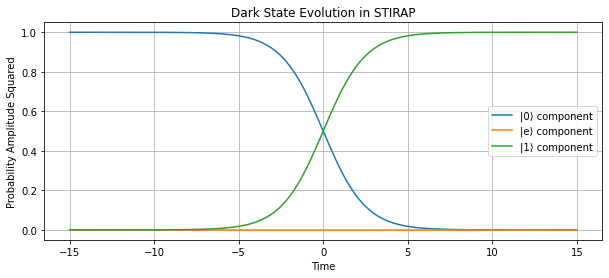

In [13]:
# ----------------------------
# 🔹 Plot 1: Dark state evolution
# ----------------------------
plt.figure(figsize=(10, 4))
plt.plot(times, dark_state_components[:, 0], label='|0⟩ component')
plt.plot(times, dark_state_components[:, 1], label='|e⟩ component')
plt.plot(times, dark_state_components[:, 2], label='|1⟩ component')
plt.title("Dark State Evolution in STIRAP")
plt.xlabel("Time")
plt.ylabel("Probability Amplitude Squared")
plt.legend()
plt.grid(True)
plt.show()

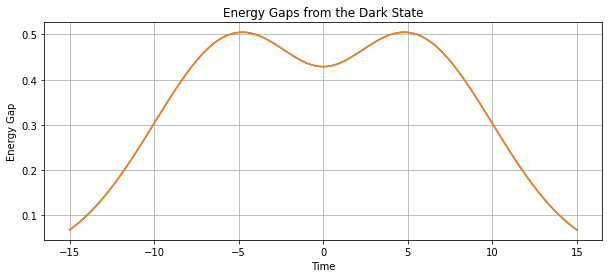

In [18]:
# ----------------------------
# 🔹 Plot 2: Energy Gaps from Dark State
# ----------------------------
plt.figure(figsize=(10, 4))
plt.plot(times, gap1_list, label='Gap to eigenstate 1')
plt.plot(times, gap2_list, label='Gap to eigenstate 2')
plt.title("Energy Gaps from the Dark State")
plt.xlabel("Time")
plt.ylabel("Energy Gap")
plt.grid(True)
plt.show()

In [29]:
def schrodinger_rhs(t, psi_flat):
    psi = psi_flat.reshape((3, 1))
    H = H_stirap(t)
    dpsi = -1j * H @ psi
    return dpsi.flatten()

In [30]:
t_span = (-20, 20)
t_eval = np.linspace(*t_span, 1000)
psi0 = np.array([1.0, 0.0, 0.0], dtype=np.complex128)

In [31]:
sol = solve_ivp(schrodinger_rhs, t_span, psi0, t_eval=t_eval, rtol=1e-8, atol=1e-10)

In [32]:
psi_t = sol.y.T  # shape: (len(t_eval), 3)
pop_0 = np.abs(psi_t[:, 0])**2
pop_e = np.abs(psi_t[:, 1])**2
pop_1 = np.abs(psi_t[:, 2])**2

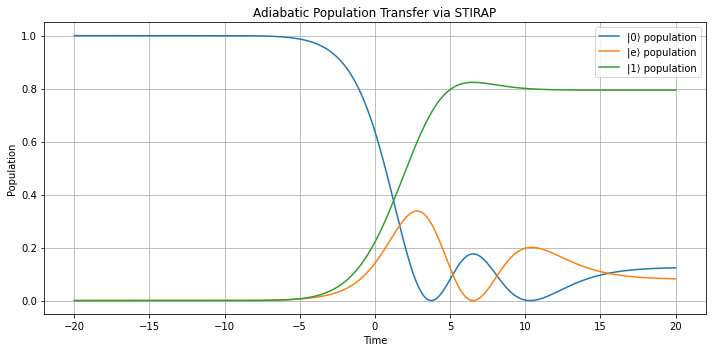

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(t_eval, pop_0, label="|0⟩ population")
plt.plot(t_eval, pop_e, label="|e⟩ population")
plt.plot(t_eval, pop_1, label="|1⟩ population")
plt.title("Adiabatic Population Transfer via STIRAP")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
P_final = pop_1[-1]
imperfection = 1 - P_final
print(f"Final population in |1⟩: {P_final:.6f}")
print(f"Transfer imperfection: {imperfection:.6e}")

Final population in |1⟩: 0.794296
Transfer imperfection: 2.057045e-01


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# =========================================================
# 1) General STIRAP Hamiltonian using arbitrary ΩP(t), ΩS(t)
#    Basis: |0>, |e>, |1>
# =========================================================
def H_stirap_general(t, OmegaP_fn, OmegaS_fn):
    OP = OmegaP_fn(t)
    OS = OmegaS_fn(t)
    return np.array([
        [0,     OP/2,     0   ],
        [OP/2,  0,        OS/2],
        [0,     OS/2,     0   ],
    ], dtype=np.complex128)

def schrodinger_rhs_general(t, psi, OmegaP_fn, OmegaS_fn):
    H = H_stirap_general(t, OmegaP_fn, OmegaS_fn)
    return -1j * (H @ psi)

# =========================================================
# 2) Pulse shapes (ΩP(t), ΩS(t)) — both return *callables*
#    Notes:
#      - For STIRAP, "counter-intuitive" means Stokes (S) comes first.
#      - We name ΩP for |0>↔|e| (pump) and ΩS for |e>↔|1| (Stokes).
# =========================================================

# ---- (a) Gaussian pulses (like your current ones) ----
def make_gaussian_pulses(Ωmax=1.0, t0_S=-5.0, t0_P=+5.0, tau_S=2.0, tau_P=5.0):
    def ΩS(t):  # Stokes first
        return Ωmax * np.exp(-((t - t0_S)**2) / (2 * tau_S**2))
    def ΩP(t):  # Pump later
        return Ωmax * np.exp(-((t - t0_P)**2) / (2 * tau_P**2))
    return ΩP, ΩS

# ---- (b) Square pulses ----
#      Parameters: start times and durations for S then P
def make_square_pulses(Ωmax=1.0, t_start_S=-8.0, dur_S=6.0, t_start_P=-1.0, dur_P=6.0):
    def rect(t, t0, dur):
        return np.where((t >= t0) & (t <= t0 + dur), 1.0, 0.0)
    def ΩS(t):
        return Ωmax * rect(t, t_start_S, dur_S)
    def ΩP(t):
        return Ωmax * rect(t, t_start_P, dur_P)
    return ΩP, ΩS

# ---- (c) Trapezoidal pulses ----
#      Piecewise linear rise-flat-fall. S earlier than P.
def make_trapezoidal_pulses(Ωmax=1.0,
                            t0_S=-10.0, Tr_S=2.0, Tf_S=6.0, Td_S=2.0,
                            t0_P=-3.0,  Tr_P=2.0, Tf_P=6.0, Td_P=2.0):
    # shape helper: rise (Tr), flat (Tf), fall (Td) starting at t0
    def trap(t, t0, Tr, Tf, Td):
        t = np.asarray(t)
        y = np.zeros_like(t, dtype=float)
        # rise
        idx = (t >= t0) & (t < t0 + Tr)
        y[idx] = (t[idx] - t0)/Tr
        # flat
        idx = (t >= t0 + Tr) & (t < t0 + Tr + Tf)
        y[idx] = 1.0
        # fall
        idx = (t >= t0 + Tr + Tf) & (t < t0 + Tr + Tf + Td)
        y[idx] = 1.0 - (t[idx] - (t0 + Tr + Tf))/Td
        return np.clip(y, 0.0, 1.0)
    def ΩS(t):
        return Ωmax * trap(t, t0_S, Tr_S, Tf_S, Td_S)
    def ΩP(t):
        return Ωmax * trap(t, t0_P, Tr_P, Tf_P, Td_P)
    return ΩP, ΩS

# ---- (d) DDP-optimized pulses ----
#      ΩP(t) = g(t) Ωmax sin[π f(t)/2],  ΩS(t) = g(t) Ωmax cos[π f(t)/2]
#      f(t) = 1/(1 + e^{ -4 t / T }),   g(t) = exp( - (t/(2T))^6 )
def make_ddp_pulses(Ωmax=1.0, T=6.0):
    def f(t):
        return 1.0/(1.0 + np.exp(-4.0*t/T))
    def g(t):
        return np.exp(- (t/(2.0*T))**6)
    def ΩP(t):
        return g(t) * Ωmax * np.sin(0.5*np.pi * f(t))
    def ΩS(t):
        return g(t) * Ωmax * np.cos(0.5*np.pi * f(t))
    return ΩP, ΩS

# =========================================================
# 3) Simulation + plotting helper
# =========================================================
def simulate_and_plot_stirap(OmegaP_fn, OmegaS_fn,
                             t_span=(-20.0, 20.0), n_points=1200,
                             psi0=None, title_suffix=""):
    if psi0 is None:
        psi0 = np.array([1.0, 0.0, 0.0], dtype=np.complex128)  # start in |0>

    t_eval = np.linspace(t_span[0], t_span[1], n_points)

    # --- Plot 1: pulse shapes
    ΩP_vals = np.array([OmegaP_fn(t) for t in t_eval], dtype=float)
    ΩS_vals = np.array([OmegaS_fn(t) for t in t_eval], dtype=float)

    plt.figure(figsize=(10, 4))
    plt.plot(t_eval, ΩS_vals, label="ΩS(t)  (Stokes)")
    plt.plot(t_eval, ΩP_vals, label="ΩP(t)  (Pump)")
    plt.title(f"Pulse Shapes {title_suffix}")
    plt.xlabel("Time")
    plt.ylabel("Rabi Frequency")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Solve Schrodinger dynamics
    def rhs(t, psi):
        return schrodinger_rhs_general(t, psi, OmegaP_fn, OmegaS_fn)

    sol = solve_ivp(rhs, t_span, psi0, t_eval=t_eval, rtol=1e-8, atol=1e-10)
    psi_t = sol.y.T  # shape (n_points, 3)

    pop_0 = np.abs(psi_t[:, 0])**2
    pop_e = np.abs(psi_t[:, 1])**2
    pop_1 = np.abs(psi_t[:, 2])**2

    # --- Plot 2: populations
    plt.figure(figsize=(10, 5))
    plt.plot(t_eval, pop_0, label="|0⟩")
    plt.plot(t_eval, pop_e, label="|e⟩")
    plt.plot(t_eval, pop_1, label="|1⟩")
    plt.title(f"Adiabatic Population Transfer via STIRAP {title_suffix}")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # return final populations for quick inspection if desired
    return pop_0[-1], pop_e[-1], pop_1[-1]

# =========================================================
# 4) Convenience wrappers for each pulse shape
# =========================================================

def run_gaussian_demo(Ωmax=1.0, t0_S=-5.0, t0_P=+5.0, tau_S=2.0, tau_P=5.0,
                      t_span=(-15, 15)):
    ΩP, ΩS = make_gaussian_pulses(Ωmax, t0_S, t0_P, tau_S, tau_P)
    return simulate_and_plot_stirap(ΩP, ΩS, t_span=t_span,
                                    title_suffix=f"(Gaussian: Ωmax={Ωmax}, t0_S={t0_S}, t0_P={t0_P})")

def run_square_demo(Ωmax=1.0, t_start_S=-10.0, dur_S=8.0, t_start_P=-3.0, dur_P=8.0,
                    t_span=(-15, 15)):
    ΩP, ΩS = make_square_pulses(Ωmax, t_start_S, dur_S, t_start_P, dur_P)
    return simulate_and_plot_stirap(ΩP, ΩS, t_span=t_span,
                                    title_suffix=f"(Square: Ωmax={Ωmax})")

def run_trapezoid_demo(Ωmax=1.0,
                       # Stokes earlier
                       t0_S=-12.0, Tr_S=2.0, Tf_S=8.0, Td_S=2.0,
                       # Pump later
                       t0_P=-3.0,  Tr_P=2.0, Tf_P=8.0, Td_P=2.0,
                       t_span=(-18, 18)):
    ΩP, ΩS = make_trapezoidal_pulses(Ωmax, t0_S, Tr_S, Tf_S, Td_S,
                                     t0_P, Tr_P, Tf_P, Td_P)
    return simulate_and_plot_stirap(ΩP, ΩS, t_span=t_span,
                                    title_suffix=f"(Trapezoidal: Ωmax={Ωmax})")

def run_ddp_demo(Ωmax=1.0, T=6.0, t_span=(-20, 20)):
    ΩP, ΩS = make_ddp_pulses(Ωmax, T)
    return simulate_and_plot_stirap(ΩP, ΩS, t_span=t_span,
                                    title_suffix=f"(DDP: Ωmax={Ωmax}, T={T})")


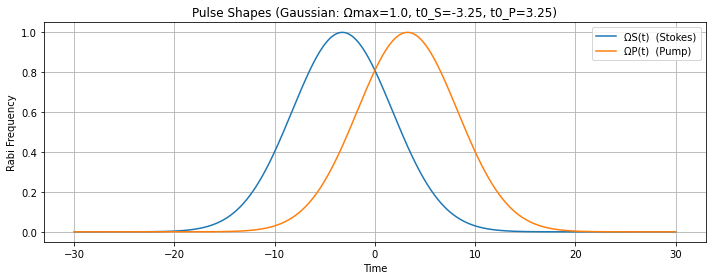

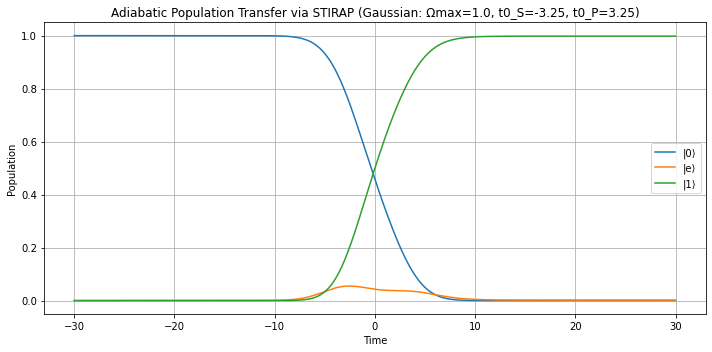

(0.00027649248946959456, 0.001559473710898783, 0.998164033024165)

In [29]:
run_gaussian_demo(Ωmax=1.0, t0_S=-3.25, t0_P=3.25, tau_S=5, tau_P=5, t_span=(-30, 30))

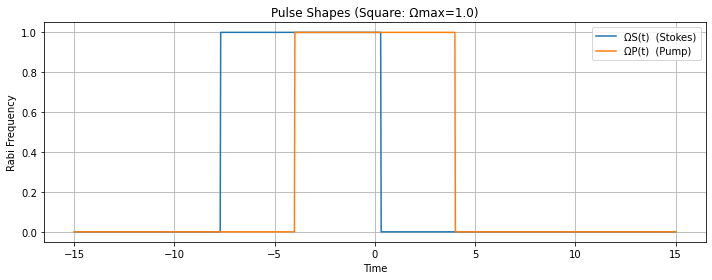

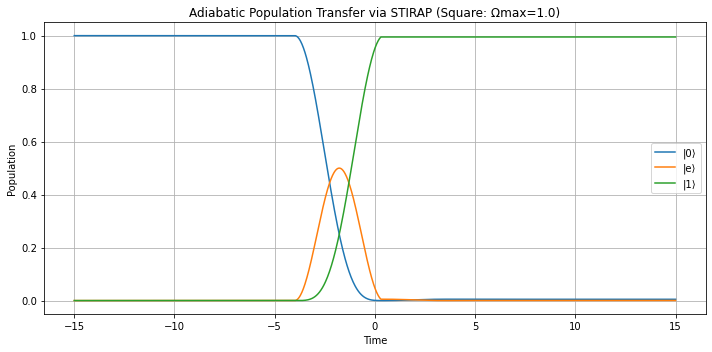

(0.004797053423310292, 0.00029597876861877883, 0.994906962987169)

In [37]:
run_square_demo(Ωmax=1.0, t_start_S=-7.7, dur_S=8.0, t_start_P=-4.0, dur_P=8.0, t_span=(-15, 15))

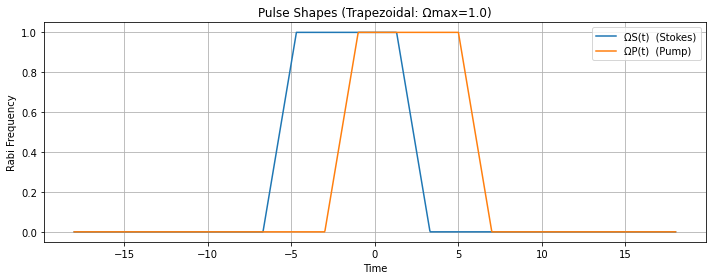

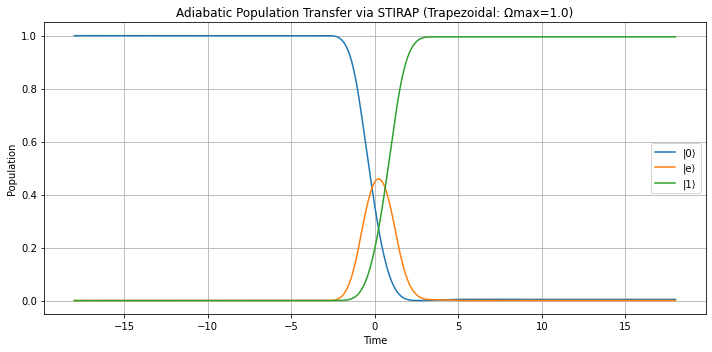

(0.004394256470831108, 0.0002586292023245061, 0.9953471097453487)

In [43]:
run_trapezoid_demo(Ωmax=1.0, t0_S=-6.7, Tr_S=2, Tf_S=6, Td_S=2,
                   t0_P=-3.0,  Tr_P=2, Tf_P=6, Td_P=2, t_span=(-18, 18))

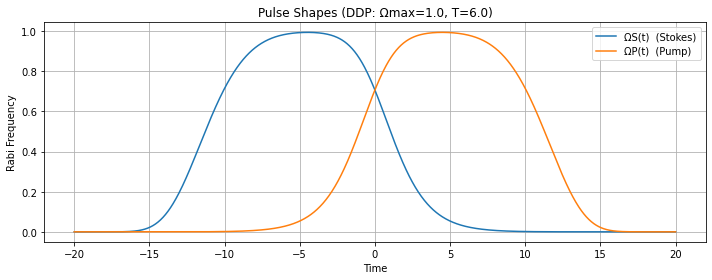

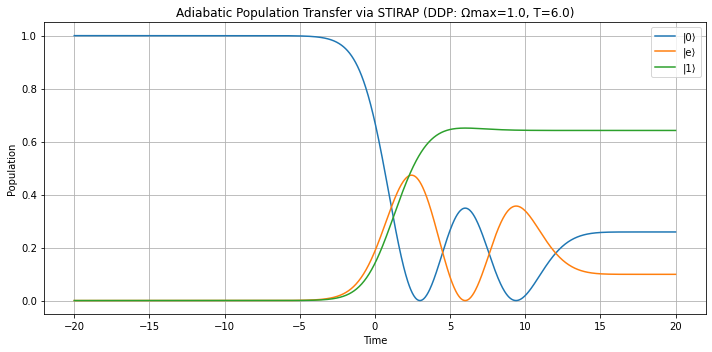

(0.25891295809268616, 0.09898027045422822, 0.6421067655643206)

In [28]:
run_ddp_demo(Ωmax=1.0, T=6.0, t_span=(-20, 20))